In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
datoteka = open('MaterialX_RT_1mm_min_fi64_3.txt', mode='r')
lines = datoteka.readlines()[7:]
t = []
Extension = [] #mm
Strain = [] #%
Load = [] #N
Stress = [] #MPa
for line in lines:
    sline = line.split(',')
    t.append((sline[0]))
    Extension.append(sline[1])
    Strain.append(sline[2])
    Load.append(sline[3])
    Stress.append(sline[4].rstrip())
t = np.array(t)
print(Extension[1:5])


['0.00072', '0.00115', '0.00150', '0.00181']


In [3]:
t1 = np.array([float(i) for i in t])
Extension1 = np.array([float(i) for i in Extension])
Strain1 = np.array([float(i) for i in Strain])
Load1 = np.array([float(i) for i in Load])
Stress1 = np.array([float(i) for i in Stress])

Naklon je 763.970 MPa


(0.0, 1.0)

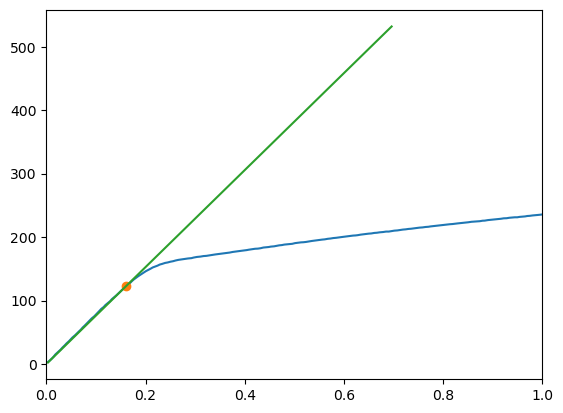

In [4]:
A = 40;
plt.plot(Strain1, Stress1)
plt.plot(Strain1[A], Stress1[A], 'o')

model = LinearRegression(fit_intercept="False")
k = model.fit(Strain1.reshape((-1,1))[:A], Stress1[:A]).coef_
print(f'Naklon je {k[0]:.3f} MPa')

x1 = np.arange(0.002, 0.25, 0.0003)
y1 = k[0] * Strain1[:140]
plt.plot(Strain1[:140], y1)
plt.xlim(0,1)
# idx = np.argwhere(np.diff(np.sign(y1[10:len(Stress1)] - Stress1[10:]))).flatten()
# plt.plot(x1[:800], Stress[:800] - y1[:800], 'ro')


Strain1 = 0.165 % 	 Stress1 = 125.022 MPa
Rp02 = 125.02227 MPa
Rm = 332.42289 MPa


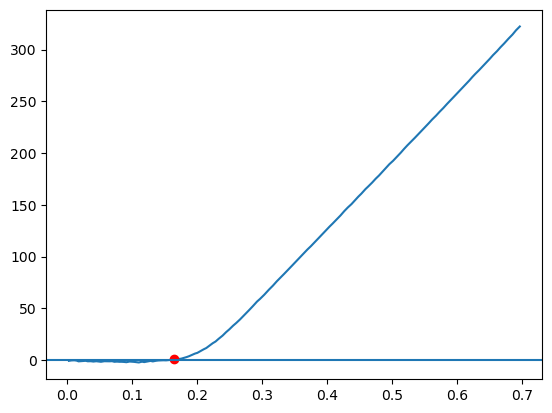

In [5]:
B = 41
plt.plot(Strain1[:140], y1-Stress1[:140])
plt.plot(Strain1[B], y1[B]-Stress1[B], 'ro')
plt.axhline(y = 0)
print(f'Strain1 = {Strain1[B]:.3f} % \t Stress1 = {Stress1[B]:.3f} MPa')
Rp02_1 = Stress1[B]
Rm_1 = max(Stress1)
print(f'Rp02 = {Rp02_1} MPa')
print(f'Rm = {Rm_1} MPa')

In [6]:
Rm_index = np.argmax(Stress1)
Rm_index

567

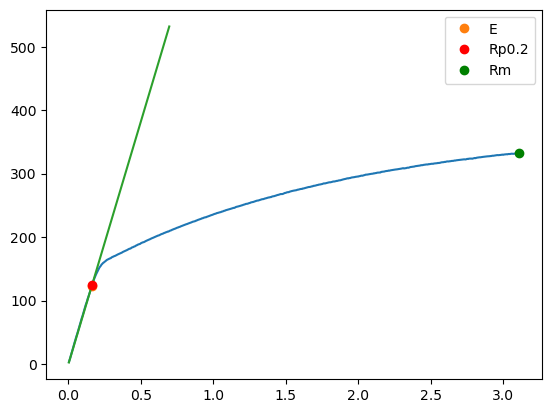

In [7]:
plt.plot(Strain1, Stress1)
plt.plot(Strain1[A], Stress1[A], 'o', label=f'E')
plt.plot(Strain1[:140], y1)
plt.plot(Strain1[B], Stress1[B], 'ro', label=f'Rp0.2')
plt.plot(Strain1[Rm_index], Stress1[Rm_index], 'go', label=f'Rm')
plt.legend()

In [8]:
Rp02_1 = Stress1[B]
Rm_1 = max(Stress1)
E = k[0]
print(f'Rp02 = {Rp02_1} MPa')
print(f'Rm = {Rm_1} MPa')
print(f'E = {E} MPa')

Rp02 = 125.02227 MPa
Rm = 332.42289 MPa
E = 763.9701518108399 MPa
